In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def membership_functions(value,variable,descriptor):
  if(descriptor=='smalldirt' and value>=0 and value<=50):
    return (50-value)/50
  elif(descriptor=='mediumdirt' and value>=30 and value<=50):
    return value/50
  elif(descriptor=='mediumdirt' and value>50 and value<=70):
    return (100-value)/50
  elif(descriptor=='largedirt' and value>=50 and value<=100):
    return (value-50)/50
  elif(variable=='grease'):
    if(descriptor=='nogrease' and value>=0 and value<=30):
      return (5-value)/50
    elif(descriptor=='mediumgrease' and value>=30 and value<=50):
      return value/50
    elif(descriptor=='mediumgrease' and value>50 and value<=70):
      return (100-value)/50
    elif(descriptor=='largegrease' and value>=50 and value<=100):
      return (value-50)/50

In [3]:
def rule_base(dirt,grease):
  if(dirt=='smalldirt'):
    dirt = 0
  elif(dirt=='mediumdirt'):
    dirt = 1
  elif(dirt=='largedirt'):
    dirt = 2
  if(grease=='nogrease'):
    grease = 0
  elif(grease=='mediumgrease'):
    grease = 1
  elif(grease=='largegrease'):
    grease = 2
  rules = [['very_short_time','short_time', 'medium_time'],['short_time','medium_time','long_time'],['medium_time','long_time','very_long_time']]
  return rules[dirt][grease]

In [4]:
def mapping_dirt(percentage):
  temp,temp1 = [],[]
  if(percentage>=0 and percentage<=50):
    temp.append(membership_functions(percentage,'dirt','smalldirt'))
    temp1.append('smalldirt')
  if(percentage>=30 and percentage<=70):
    temp.append(membership_functions(percentage,'dirt','mediumdirt'))
    temp1.append('mediumdirt')
  if(percentage>=50 and percentage<=100):
    temp.append(membership_functions(percentage,'dirt','largedirt'))
    temp1.append('largedirt')
  return temp,temp1


In [5]:
def mapping_grease(percentage):
  temp,temp1 = [],[]
  if(percentage>=0 and percentage<=50):
    temp.append(membership_functions(percentage,'grease','nogrease'))
    temp1.append('nogrease')
  if(percentage>=30 and percentage<=70):
    temp.append(membership_functions(percentage,'grease','mediumgrease'))
    temp1.append('mediumgrease')
  if(percentage>=50 and percentage<=100):
    temp.append(membership_functions(percentage,'grease','largegrease'))
    temp1.append('largegrease')
  return temp,temp1

In [6]:
def mapping_washing_time(variable,value):
  temp = []
  if(variable=='very_short_time'):
    temp.append((-1)*((value*10)-10))
  elif(variable=='short_time'):
    temp.append(value*10)
    temp.append((-1)*((value*15)-25))
  elif(variable=='medium_time'):
    temp.append((value*15)+10)
    temp.append((-1)*((value*15)-40))
  elif(variable=='long_time'):
    temp.append((value*15)+25)
    temp.append((-1)*((value*20)-60))
  elif(variable=='very_long_time'):
    temp.append((value*20)+40)
  return sum(temp)/len(temp)

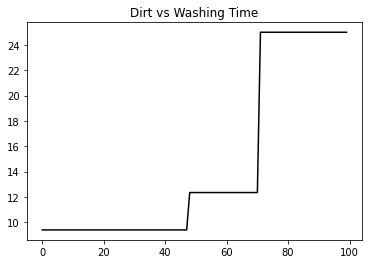

In [7]:
import itertools as it
x = []
for m in range(0, 100):
  l1,l1_rule = mapping_dirt(m)
 
  n = 2
  l2,l2_rule = mapping_grease(n)

  a = list(map(min,list(it.product(l1,l2))))
  b = list(it.product(l1_rule,l2_rule))
  
  temp1,temp2 = map(str,b[a.index(max(a))])
  
  x.append(mapping_washing_time(rule_base(temp1,temp2),max(a)))

m = np.arange(0, 100, 1)
plt.plot(m, x, color ='k')
plt.title('Dirt vs Washing Time')
plt.show()

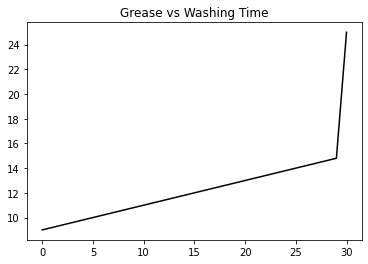

In [8]:
x = []
for n in range(0, 31):
  m = 30
  l1,l1_rule = mapping_dirt(m)
  
  l2,l2_rule = mapping_grease(n)
  
  a = list(map(min,list(it.product(l1,l2))))
  b = list(it.product(l1_rule,l2_rule))
  
  temp1,temp2 = map(str,b[a.index(max(a))])
  
  x.append(mapping_washing_time(rule_base(temp1,temp2),max(a)))

n = np.arange(0, 31, 1)
plt.plot(n, x, color ='k')
plt.title('Grease vs Washing Time')
plt.show()

In [9]:
def membership_functions(value,variable,descriptor):
  if(descriptor=='very_short_time' and value>=0 and value<=10):
    return value/10
  elif(descriptor=='very_short_time' and value>=10 and value<=15):
    return (15-value)/10
  elif(descriptor=='short_time' and value>=10 and value<=15):
    return value/15
  elif(descriptor=='short_time' and value>=15 and value<=30):
    return (30-value)/15
  elif(descriptor=='medium_time' and value>25 and value<=30):
    return (value)/25
  elif(descriptor=='medium_time' and value>30 and value<=40):
    return (40-value)/25
  elif(descriptor=='long_time' and value>=35 and value<=40):
    return (value)/40
  elif(descriptor=='long_time' and value>=40 and value<=50):
    return (50-value)/40
  elif(descriptor=='very_long_time' and value>=45 and value<=75):
    return (value-45)/45


In [10]:
def mapping_washing_time(time):
  temp,temp1 = [],[]
  if(time>=0 and time<=15):
    temp.append(membership_functions(time,'time','very_short_time'))
    temp1.append('very_short_time')
  if(time>=10 and time<=30):
    temp.append(membership_functions(time,'time','short_time'))
    temp1.append('short_time')
  if(time>=25 and time<=40):
    temp.append(membership_functions(time,'time','medium_time'))
    temp1.append('medium_time')
  if(time>=35 and time<=50):
    temp.append(membership_functions(time,'time','long_time'))
    temp1.append('long_time')
  if(time>=45 and time<=75):
    temp.append(membership_functions(time,'time','very_long_time'))
    temp1.append('very_long_time')
  return temp,temp1

In [11]:
def rule_base(time):
  if(time=='very_short_time'):
    time = 0
  elif(time=='short_time'):
    time = 1
  elif(time=='medium_time'):
    time = 2
  elif(time=='long_time'):
    time = 3
  elif(time=='very_long_time'):
    time = 4
  rules = [['smalldirt','nogrease'],['mediumdirt','nogrease'],['mediumdirt','mediumgrease'], ['largedirt', 'mediumgrease'], ['largedirt', 'largegrease']]
  return rules[time]

In [12]:
def mapping_dirt(variable,value):
  temp = []
  if(variable=='smalldirt'):
    temp.append((-1)*((value*10)-10))
  elif(variable=='mediumdirt'):
    temp.append(value*10)
    temp.append((-1)*((value*15)-25))
  elif(variable=='largedirt'):
    temp.append((value*15)+10)
    temp.append((-1)*((value*15)-40))
  return sum(temp)/len(temp)

In [13]:
def mapping_grease(variable,value):
  temp = []
  if(variable=='nogrease'):
    temp.append((-1)*((value*10)-10))
  elif(variable=='mediumgrease'):
    temp.append(value*10)
    temp.append((-1)*((value*15)-25))
  elif(variable=='largegrease'):
    temp.append((value*15)+10)
    temp.append((-1)*((value*15)-40))
  return sum(temp)/len(temp)

In [14]:
import itertools as it
t = int(input("Enter time : "))
l1,l1_rule = mapping_washing_time(t)
x = [1]
print(l1, l1_rule)
a = list(map(min,list(it.product(l1))))
b = list(it.product(l1_rule, x))
print(a, b)
temp1,temp2 = map(str,b[a.index(max(a))])

k = rule_base(temp1)
print("Dirt:", mapping_dirt(k[0],max(a)),"%")
print("Grease:", mapping_grease(k[1],max(a)),"%")


Enter time : 40
[0.0, 1.0] ['medium_time', 'long_time']
[0.0, 1.0] [('medium_time', 1), ('long_time', 1)]
Dirt: 25.0 %
Grease: 10.0 %
